<a href="https://colab.research.google.com/github/ua-datalab/GraphML/blob/main/04_15_GraphML_Lecture03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture 3: Node classification with vanilla neural networks and vanilla graph neural networks**

### Graph datasets often extend beyond a simple collection of connections between entities. In addition to the nodes and edges that form the core of the graph structure, these datasets can also include a wealth of supplementary information. Nodes and edges may be associated with various features, such as scores, colors, textual attributes, and other descriptive properties.


---


### Incorporating this auxiliary data into the input for graph-based machine learning models is crucial for generating high-quality embeddings and representations. By leveraging both the structural information and the rich node and edge features, the models can learn more comprehensive and meaningful representations of the underlying entities and their relationships.


---


### This concept of blending structured graph data with additional feature information is a natural extension of traditional machine learning techniques. Just as tabular datasets in non-graph settings often include multiple columns of descriptive attributes, graph datasets harness the power of both the relational structure and the node- and edge-level features to enable more insightful and accurate learning.

# Introducing graph datasets:



*  **CORA:** It consists of a citation network of 2,708 scientific publications, with each publication belonging to one of seven classes, such as Neural Networks, Reinforcement Learning, or Rule Learning. The dataset captures the citation relationships between these publications, represented by 5,429 directed edges. This structured data allows researchers to evaluate how well graph neural network (GNN) models can leverage both the content information (e.g., the text of the publication abstracts) and the relational structure (the citation links) to accurately classify the publications into their respective topics.
*   **Facebook Page-Page Dataset:** It is another popular benchmark for evaluating graph neural network models. It represents the relationships between 22,470 Facebook pages, which are categorized into four classes: Politician, Government, Company, and Public Figure. The dataset contains 171,002 connections (edges) between these pages, capturing the complex social interactions and affinities between different types of entities on the Facebook platform.






## **The Cora Dataset**

<img src="https://graphsandnetworks.com/wp-content/uploads/2019/09/CoraBalloons.png" alt="Description of Image" width="500" height="auto">


## **The Facebook Page-Page Dataset**

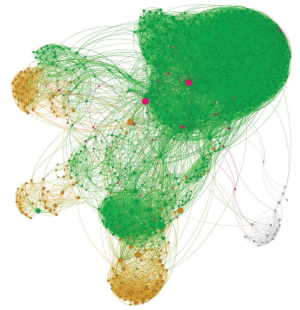

## These datasets are richer than the zachary karate club graph we discussed.

| Graph             | Nodes    | Edges |Classes |
| :---------------: | :------: | :---: | :---:  |
| Zachary Karate Club|   34   | 78  |    2  (not predefined) |
| Cora          |   2,708   | 5,429 |       7 |
| FB Page-Page    |  22,470   | 171,002 |     4   |


## **Installing pytorch-geometric**

In [1]:
!pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.4 MB/s eta 0:00:00


## **Load datasets**

In [2]:
from torch_geometric.datasets import Planetoid, FacebookPagePage

In [4]:
dataset_CORA = Planetoid(root=".", name="Cora")

In [5]:
data_graph_CORA = dataset_CORA[0] # get the cora graph

In [6]:
# Print information about the dataset
print(f'Dataset: {dataset_CORA}')
print('---------------')
print(f'Number of graphs: {len(dataset_CORA)}')
print(f'Number of nodes: {data_graph_CORA.x.shape[0]}')
print(f'Number of features: {dataset_CORA.num_features}')
print(f'Number of classes: {dataset_CORA.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data_graph_CORA.is_directed()}')
print(f'Graph has isolated nodes: {data_graph_CORA.has_isolated_nodes()}')
print(f'Graph has loops: {data_graph_CORA.has_self_loops()}')

Dataset: Cora()
---------------
Number of graphs: 1
Number of nodes: 2708
Number of features: 1433
Number of classes: 7

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


In [7]:
dataset_FBPP = FacebookPagePage(root="./facebook_pagepage")

Processing...
Done!


In [8]:
data_graph_FBPP = dataset_FBPP[0] # the graph

In [9]:
# Print information about the dataset
print(f'Dataset: {dataset_FBPP}')
print('---------------')
print(f'Number of graphs: {len(dataset_FBPP)}')
print(f'Number of nodes: {data_graph_FBPP.x.shape[0]}')
print(f'Number of features: {dataset_FBPP.num_features}')
print(f'Number of classes: {dataset_FBPP.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data_graph_FBPP.is_directed()}')
print(f'Graph has isolated nodes: {data_graph_FBPP.has_isolated_nodes()}')
print(f'Graph has loops: {data_graph_FBPP.has_self_loops()}')

Dataset: FacebookPagePage()
---------------
Number of graphs: 1
Number of nodes: 22470
Number of features: 128
Number of classes: 4

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: True


## Facebook Page-Page dataset does not have training, evaluation, test by default so we make them

In [10]:
dataset_FBPP.data.train_mask = range(18000)
dataset_FBPP.data.val_mask = range(18001, 20000)
dataset_FBPP.data.test_mask = range(20001, 22470)

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)




---



---



---



## Now, coming back to Cora dataset and we will train a simple multi-layer perceptron (Vanilla Neural Network )

## MLP on Cora

In [11]:
import pandas as pd

df_x = pd.DataFrame(data_graph_CORA.x.numpy())

df_x['label'] = pd.DataFrame(data_graph_CORA.y)

In [12]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,1424,1425,1426,1427,1428,1429,1430,1431,1432,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2704,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [13]:
import torch
torch.manual_seed(0)
from torch.nn import Linear
import torch.nn.functional as F

In [14]:
def accuracy(y_pred, y_true):
    return torch.sum(y_pred == y_true) / len(y_true)

In [15]:
class MLP(torch.nn.Module):

    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.linear1 = Linear(dim_in, dim_h)
        self.linear2 = Linear(dim_h, dim_out)

    def forward(self, x):
        x = self.linear1(x)
        x = torch.relu(x)
        x = self.linear2(x)

        return F.log_softmax(x, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=0.01, weight_decay=5e-4)
        self.train()

        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])

            loss.backward()
            optimizer.step()

            if epoch % 20 ==0:
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1), data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [16]:
mlp = MLP(dataset_CORA.num_features, 16, dataset_CORA.num_classes)

In [17]:
mlp

MLP(
  (linear1): Linear(in_features=1433, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=7, bias=True)
)

In [18]:
mlp.fit(dataset_CORA.data, epochs=100)

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Epoch   0 | Train Loss: 1.959 | Train Acc: 14.29% | Val Loss: 2.00 | Val Acc: 12.40%
Epoch  20 | Train Loss: 0.110 | Train Acc: 100.00% | Val Loss: 1.46 | Val Acc: 49.40%
Epoch  40 | Train Loss: 0.014 | Train Acc: 100.00% | Val Loss: 1.44 | Val Acc: 51.00%
Epoch  60 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.40 | Val Acc: 53.80%
Epoch  80 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.37 | Val Acc: 55.40%
Epoch 100 | Train Loss: 0.009 | Train Acc: 100.00% | Val Loss: 1.34 | Val Acc: 54.60%


In [19]:
acc = mlp.test(dataset_CORA.data)

In [20]:
print(f'\nMLP on CORA test accuracy: {acc*100:.2f}%')


MLP test accuracy: 53.40%


## **MLP on Facebook Page-Page Dataset**

In [21]:
mlp_fb = MLP(dataset_FBPP.num_features, 16, dataset_FBPP.num_classes)

In [22]:
mlp_fb.fit(dataset_FBPP.data, epochs=100)

Epoch   0 | Train Loss: 1.406 | Train Acc: 21.38% | Val Loss: 1.41 | Val Acc: 21.61%
Epoch  20 | Train Loss: 0.659 | Train Acc: 73.50% | Val Loss: 0.67 | Val Acc: 72.04%
Epoch  40 | Train Loss: 0.578 | Train Acc: 76.80% | Val Loss: 0.62 | Val Acc: 74.79%
Epoch  60 | Train Loss: 0.548 | Train Acc: 78.05% | Val Loss: 0.61 | Val Acc: 75.09%
Epoch  80 | Train Loss: 0.531 | Train Acc: 78.63% | Val Loss: 0.60 | Val Acc: 75.34%
Epoch 100 | Train Loss: 0.518 | Train Acc: 79.19% | Val Loss: 0.61 | Val Acc: 75.29%


In [24]:
acc = mlp_fb.test(dataset_FBPP.data)
print(f'\nMLP on Facebook Page-Page test accuracy: {acc*100:.2f}%')


MLP test accuracy: 75.13%


## **Coding our first Vanilla Graph neural network**

## Recap - Understanding Node Features and the Adjacency Matrix

- **Node Features**: In a graph, each node can have attributes or features represented as a vector. For instance, in a social network, features could include age, location, and interests for each user. These features are typically organized into a matrix \(X\) where each row represents a node and each column represents a feature.

- **Adjacency Matrix**: This is a square matrix used to represent a graph, where the element at row \(i\) and column \(j\) indicates whether there is an edge from node \(i\) to node \(j\). In simple terms, it shows how nodes are connected. For undirected graphs, this matrix is symmetric.

## Multiplication of Adjacency Matrix with Node Features

- **Operation**: When you multiply the adjacency matrix \(A\) with the node features matrix \(X\) (i.e., \(AX\)), each entry in the resulting matrix is computed as a weighted sum of the features of adjacent nodes. Specifically, the element at row \(i\) in the result represents the combined features of all nodes connected to node \(i\), weighted by their respective connection strengths (if the edges have weights).

## Integrating Local Neighborhood Information

- **Aggregation**: The multiplication \(AX\) aggregates information across the immediate neighbors of each node. This means that the feature vector of each node in the output matrix is now a blend of its own features and those of its neighbors. This aggregation is fundamental in GNNs because it allows the model to learn from not just the features of a single node but from its local neighborhood structure as well.

## Why This Makes It a GNN

- **Learning from Graph Structure**: By repeatedly applying this multiplication through multiple layers (with non-linear transformations and possibly other operations in between), a GNN can effectively learn to represent and classify nodes based on both their features and the broader structure of the graph. This is crucial in tasks where the connectivity of the data points (nodes) impacts the output, such as predicting protein interactions in a biological network or recommending friends in a social network.

- **Feature Propagation**: The process of multiplying by the adjacency matrix essentially propagates and updates node features across the graph. This enables the GNN to capture patterns at various levels of the graph's topology, from immediate neighbors to larger subgraphs, depending on the depth of the network.

In [25]:
class VanillaGNNLayer(torch.nn.Module):
    def __init__(self, dim_in, dim_out):
        super().__init__()
        self.linear = Linear(dim_in, dim_out, bias=False)

    def forward(self, x, adjacency):
        x = self.linear(x)
        x = torch.sparse.mm(adjacency, x)
        return x

In [26]:
from torch_geometric.utils import to_dense_adj

adjacency_cora = to_dense_adj(dataset_CORA.data.edge_index)[0]
adjacency_cora += torch.eye(len(adjacency_cora))
adjacency_cora



adjacency_fbpp = to_dense_adj(dataset_FBPP.data.edge_index)[0]
adjacency_fbpp += torch.eye(len(adjacency_fbpp))
adjacency_fbpp

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [27]:
adjacency_cora.shape, adjacency_fbpp.shape

(torch.Size([2708, 2708]), torch.Size([22470, 22470]))

In [28]:
class VanillaGNN(torch.nn.Module):
    """Vanilla Graph Neural Network"""
    def __init__(self, dim_in, dim_h, dim_out):
        super().__init__()
        self.gnn1 = VanillaGNNLayer(dim_in, dim_h)
        self.gnn2 = VanillaGNNLayer(dim_h, dim_out)

    def forward(self, x, adjacency):
        h = self.gnn1(x, adjacency)
        h = torch.relu(h)
        h = self.gnn2(h, adjacency)
        return F.log_softmax(h, dim=1)

    def fit(self, data, epochs):
        criterion = torch.nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(self.parameters(),
                                      lr=0.01,
                                      weight_decay=5e-4)

        self.train()
        for epoch in range(epochs+1):
            optimizer.zero_grad()
            out = self(data.x, adjacency)
            loss = criterion(out[data.train_mask], data.y[data.train_mask])
            acc = accuracy(out[data.train_mask].argmax(dim=1),
                          data.y[data.train_mask])
            loss.backward()
            optimizer.step()

            if(epoch % 20 == 0):
                val_loss = criterion(out[data.val_mask], data.y[data.val_mask])
                val_acc = accuracy(out[data.val_mask].argmax(dim=1),
                                  data.y[data.val_mask])
                print(f'Epoch {epoch:>3} | Train Loss: {loss:.3f} | Train Acc:'
                      f' {acc*100:>5.2f}% | Val Loss: {val_loss:.2f} | '
                      f'Val Acc: {val_acc*100:.2f}%')

    @torch.no_grad()
    def test(self, data):
        self.eval()
        out = self(data.x, adjacency)
        acc = accuracy(out.argmax(dim=1)[data.test_mask], data.y[data.test_mask])
        return acc

In [29]:
# Create the Vanilla GNN model

adjacency = adjacency_cora
gnn = VanillaGNN(dataset_CORA.num_features, 16, dataset_CORA.num_classes)
print(gnn)

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=1433, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=7, bias=False)
  )
)


In [30]:
# Train
gnn.fit(dataset_CORA.data, epochs=100)

Epoch   0 | Train Loss: 2.351 | Train Acc: 20.00% | Val Loss: 2.37 | Val Acc: 9.00%
Epoch  20 | Train Loss: 0.101 | Train Acc: 97.86% | Val Loss: 1.62 | Val Acc: 73.60%
Epoch  40 | Train Loss: 0.013 | Train Acc: 100.00% | Val Loss: 2.20 | Val Acc: 72.40%
Epoch  60 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 2.39 | Val Acc: 72.00%
Epoch  80 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 2.40 | Val Acc: 72.60%
Epoch 100 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 2.39 | Val Acc: 73.00%


In [31]:
# Test
acc = gnn.test(dataset_CORA.data)
print(f'\nGNN test accuracy on CORA: {acc*100:.2f}%')


GNN test accuracy on CORA: 75.00%


## **GNN on the Facebook Page-Page Dataset**

In [32]:
adjacency=adjacency_fbpp
gnn_fb = VanillaGNN(dataset_FBPP.num_features, 16, dataset_FBPP.num_classes)

In [33]:
gnn_fb

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=128, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=4, bias=False)
  )
)

In [34]:
gnn_fb.fit(dataset_FBPP.data, epochs=100)

Epoch   0 | Train Loss: 176.683 | Train Acc: 28.31% | Val Loss: 173.10 | Val Acc: 28.41%
Epoch  20 | Train Loss: 6.675 | Train Acc: 79.69% | Val Loss: 4.49 | Val Acc: 80.19%
Epoch  40 | Train Loss: 2.284 | Train Acc: 82.15% | Val Loss: 1.60 | Val Acc: 83.64%
Epoch  60 | Train Loss: 1.233 | Train Acc: 83.91% | Val Loss: 1.06 | Val Acc: 84.34%
Epoch  80 | Train Loss: 0.812 | Train Acc: 84.94% | Val Loss: 0.78 | Val Acc: 84.79%
Epoch 100 | Train Loss: 1.321 | Train Acc: 84.33% | Val Loss: 0.96 | Val Acc: 84.39%


In [ ]:
acc = gnn_fb.test(dataset_FBPP.data)
print(f'\nGNN test accuracy for Facebook Page Page Dataset: {acc*100:.2f}%')


GNN test accuracy: 82.67%


## **Let's move to the Next Part of this tutorial and consider other graphs**

## **CiteSeer and Pubmed dataset**

**CiteSeer Dataset:** This is a citation network graph where nodes represent academic papers and edges represent citations between these papers. Each node is described by a text feature vector extracted from the content of the paper, and nodes are classified into one of several academic topics. The dataset is typically used to evaluate performance of graph-based machine learning algorithms. There are 6 classes, each representing a different topic or field within academic papers.

**PubMed Dataset:** Similar to the CiteSeer, PubMed is also a citation graph but specifically comprises scientific papers related to diabetes from the PubMed database. Each node in the graph represents a paper and comes with a feature vector derived from a TF-IDF weighted word vector from the abstract of the paper. Nodes are labeled with one of three classes, indicating the type of diabetes they concern. This dataset is also widely used in graph neural network research. There are 3 classes, which categorize the papers based on different types of diabetes research topics.

| Graph             | Nodes    | Edges |Classes |
| :---------------: | :------: | :---: | :---:  |
| Zachary Karate Club|   34   | 78  |    2  (not predefined) |
| Cora          |   2,708   | 5,429 |       7 |
| FB Page-Page    |  22,470   | 171,002 |     4   |
| -   |  -   | - |     -   |
| CiteSeer   |  3,327   | 4,732 |     6   |
| Pubmed    |  19,717   | 44,338 |     3   |

In [35]:
dataset_CSeer = Planetoid(root=".", name="CiteSeer")

Processing...
Done!


In [36]:
data_graph_CSeer = dataset_CSeer[0] # get the citeseer graph

In [37]:
# Print information about the dataset
print(f'Dataset: {dataset_CSeer}')
print('---------------')
print(f'Number of graphs: {len(dataset_CSeer)}')
print(f'Number of nodes: {data_graph_CSeer.x.shape[0]}')
print(f'Number of features: {dataset_CSeer.num_features}')
print(f'Number of classes: {dataset_CSeer.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data_graph_CSeer.is_directed()}')
print(f'Graph has isolated nodes: {data_graph_CSeer.has_isolated_nodes()}')
print(f'Graph has loops: {data_graph_CSeer.has_self_loops()}')

Dataset: CiteSeer()
---------------
Number of graphs: 1
Number of nodes: 3327
Number of features: 3703
Number of classes: 6

Graph:
------
Edges are directed: False
Graph has isolated nodes: True
Graph has loops: False


In [38]:
dataset_PM = Planetoid(root=".", name="PubMed")

Processing...
Done!


In [39]:
data_graph_PM = dataset_PM[0] # the Pubmed graph

In [40]:
# Print information about the dataset
print(f'Dataset: {dataset_PM}')
print('---------------')
print(f'Number of graphs: {len(dataset_PM)}')
print(f'Number of nodes: {data_graph_PM.x.shape[0]}')
print(f'Number of features: {dataset_PM.num_features}')
print(f'Number of classes: {dataset_PM.num_classes}')

# Print information about the graph
print(f'\nGraph:')
print('------')
print(f'Edges are directed: {data_graph_PM.is_directed()}')
print(f'Graph has isolated nodes: {data_graph_PM.has_isolated_nodes()}')
print(f'Graph has loops: {data_graph_PM.has_self_loops()}')

Dataset: PubMed()
---------------
Number of graphs: 1
Number of nodes: 19717
Number of features: 500
Number of classes: 3

Graph:
------
Edges are directed: False
Graph has isolated nodes: False
Graph has loops: False


## **MLP on CiteSeer**

In [41]:
df_x = pd.DataFrame(data_graph_CSeer.x.numpy())

df_x['label'] = pd.DataFrame(data_graph_CSeer.y)

In [42]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,3694,3695,3696,3697,3698,3699,3700,3701,3702,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3324,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [43]:
mlp = MLP(dataset_CSeer.num_features, 16, dataset_CSeer.num_classes)

In [44]:
mlp.fit(dataset_CSeer.data, epochs=100)

/usr/local/lib/python3.10/dist-packages/torch_geometric/data/in_memory_dataset.py:300: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


Epoch   0 | Train Loss: 1.802 | Train Acc: 16.67% | Val Loss: 1.82 | Val Acc: 18.80%
Epoch  20 | Train Loss: 0.008 | Train Acc: 100.00% | Val Loss: 1.43 | Val Acc: 47.80%
Epoch  40 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 1.48 | Val Acc: 46.20%
Epoch  60 | Train Loss: 0.003 | Train Acc: 100.00% | Val Loss: 1.34 | Val Acc: 48.20%
Epoch  80 | Train Loss: 0.005 | Train Acc: 100.00% | Val Loss: 1.29 | Val Acc: 50.80%
Epoch 100 | Train Loss: 0.006 | Train Acc: 100.00% | Val Loss: 1.28 | Val Acc: 52.60%


In [45]:
acc = mlp.test(dataset_CSeer.data)

In [46]:
print(f'\nMLP on Citeseer - test accuracy: {acc*100:.2f}%')


MLP on Citeseer - test accuracy: 52.70%


## **MLP on PubMed graph**

In [47]:
mlp_pm = MLP(dataset_PM.num_features, 16, dataset_PM.num_classes)

In [48]:
mlp_pm.fit(dataset_PM.data, epochs=100)

Epoch   0 | Train Loss: 1.113 | Train Acc: 33.33% | Val Loss: 1.16 | Val Acc: 19.60%
Epoch  20 | Train Loss: 0.603 | Train Acc: 100.00% | Val Loss: 0.93 | Val Acc: 65.20%
Epoch  40 | Train Loss: 0.113 | Train Acc: 100.00% | Val Loss: 0.75 | Val Acc: 69.00%
Epoch  60 | Train Loss: 0.050 | Train Acc: 100.00% | Val Loss: 0.71 | Val Acc: 71.00%
Epoch  80 | Train Loss: 0.045 | Train Acc: 100.00% | Val Loss: 0.70 | Val Acc: 71.00%
Epoch 100 | Train Loss: 0.038 | Train Acc: 100.00% | Val Loss: 0.69 | Val Acc: 70.80%


In [49]:
acc = mlp_pm.test(dataset_PM.data)
print(f'\nMLP on PubMed test accuracy: {acc*100:.2f}%')


MLP on PubMed test accuracy: 71.90%


## **Vanilla GNN on Citeseer and Pubmed**

In [50]:
adjacency_cseer = to_dense_adj(dataset_CSeer.data.edge_index)[0]
adjacency_cseer += torch.eye(len(adjacency_cseer))
adjacency_cseer



adjacency_pm = to_dense_adj(dataset_PM.data.edge_index)[0]
adjacency_pm += torch.eye(len(adjacency_pm))
adjacency_pm

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.]])

In [51]:
adjacency_cseer.shape, adjacency_pm.shape

(torch.Size([3327, 3327]), torch.Size([19717, 19717]))

In [52]:
adjacency = adjacency_cseer
gnn = VanillaGNN(dataset_CSeer.num_features, 16, dataset_CSeer.num_classes)
print(gnn)

VanillaGNN(
  (gnn1): VanillaGNNLayer(
    (linear): Linear(in_features=3703, out_features=16, bias=False)
  )
  (gnn2): VanillaGNNLayer(
    (linear): Linear(in_features=16, out_features=6, bias=False)
  )
)


In [53]:
gnn.fit(dataset_CSeer.data, epochs=100)

Epoch   0 | Train Loss: 1.855 | Train Acc: 17.50% | Val Loss: 1.87 | Val Acc: 16.20%
Epoch  20 | Train Loss: 0.001 | Train Acc: 100.00% | Val Loss: 3.25 | Val Acc: 62.20%
Epoch  40 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 3.57 | Val Acc: 65.00%
Epoch  60 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 3.40 | Val Acc: 65.80%
Epoch  80 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 3.17 | Val Acc: 65.80%
Epoch 100 | Train Loss: 0.000 | Train Acc: 100.00% | Val Loss: 2.97 | Val Acc: 66.80%


In [54]:
# Test
acc = gnn.test(dataset_CSeer.data)
print(f'\nGNN on CiteSeer test accuracy: {acc*100:.2f}%')


GNN on CiteSeer test accuracy: 65.30%


In [55]:
adjacency=adjacency_pm
gnn_pm = VanillaGNN(dataset_PM.num_features, 16, dataset_PM.num_classes)

In [56]:
gnn_pm.fit(dataset_PM.data, epochs=100)

Epoch   0 | Train Loss: 1.123 | Train Acc: 23.33% | Val Loss: 1.14 | Val Acc: 24.40%
Epoch  20 | Train Loss: 0.064 | Train Acc: 100.00% | Val Loss: 0.84 | Val Acc: 78.00%
Epoch  40 | Train Loss: 0.004 | Train Acc: 100.00% | Val Loss: 1.25 | Val Acc: 79.00%
Epoch  60 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.29 | Val Acc: 79.20%
Epoch  80 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.27 | Val Acc: 79.40%
Epoch 100 | Train Loss: 0.002 | Train Acc: 100.00% | Val Loss: 1.23 | Val Acc: 79.40%


In [57]:
acc = gnn_pm.test(dataset_PM.data)
print(f'\nGNN on PubMed test accuracy: {acc*100:.2f}%')


GNN on PubMed test accuracy: 76.50%


## **In Summary**

| Dataset  | MLP             | GNN              | Outperformance ⬆|
|:----------:|:-----------------:|:------------------:| :-------------: |
| Cora     | 53.40% | 75.00%  |21.6 % |
| Facebook Page-Page | 75.13% | 82.67%  | 7.54%|
| CiteSeer | 52.70% | 65.50%  | 12.8% |
| PubMed   | 71.90% | 76.50%  | 4.6%|

**Thank You! ✈**